### This is an MSc project on big data submitted to the university of Hull.
### Context 

The health of women throughout pregnancy, childbirth, and the postpartum period is referred to as maternal health. Despite significant advancement over the past 20 years, 295 000 women died during or after pregnancy and childbirth in 2017. This number is unacceptably high. In addition to indirect factors including anaemia, and malaria, the most frequent direct causes of maternal injury and death are excessive blood loss, infection, and high blood pressure. Most maternal deaths are preventable with timely management by skilled professionals working together across different disciplines.  

### Task
Imagine you are a data scientist working alongside clinicians, interested in analysing maternal health data, and identifying evidence based actions with an aim to improve health outcomes.

Produce a report answering the following questions. 
1)    Build and fit a linear model, assuming that the response variable is Systolic BP, and the exploratory variable(s) of your choice. Explain why you chose these exploratory variables.
2)    Apply the principal component analysis (PCA) to reduce number of variables.
3)    Investigate the relationship between age and heartrate  by means of age grouping.
Provide graphical representation. (Hint: Calculate mean heartrate for each group)
Explain your choice of age intervals.

Blood pressure is recorded with 2 numbers: the systolic pressure and diastolic blood pressure. Assume, the high systolic blood pressure starts from 140, the high diastolic blood pressure starts from 90. The normal systolic pressure is in the range (110, 140). The normal diastolic blood pressure is in the range (70, 90). The low systolic pressure is lower than 110, and low diastolic is less than 70.

4)    Describe how would you investigate associations between pairs high/high, normal/normal, and low/low diastolic and systolic blood pressure.  
Calculate, and interpret the following:
(1)    Support
(2)    Confidence
(3)    Conviction
(4)    Lift

5)    Find clusters of patients with similar Systolic BP.

6)    Calculate the correlation between age and systolic BP. Interpret your result.

7)    Do your findings agree with the relevant literature? Describe in detail.

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


#### Load the dataset

In [2]:
#Read the data
data = pd.read_csv('mhs.csv')
data

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


In [3]:
data.isnull().sum() # Check for null values

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


### EDA

<Figure size 1500x1500 with 0 Axes>

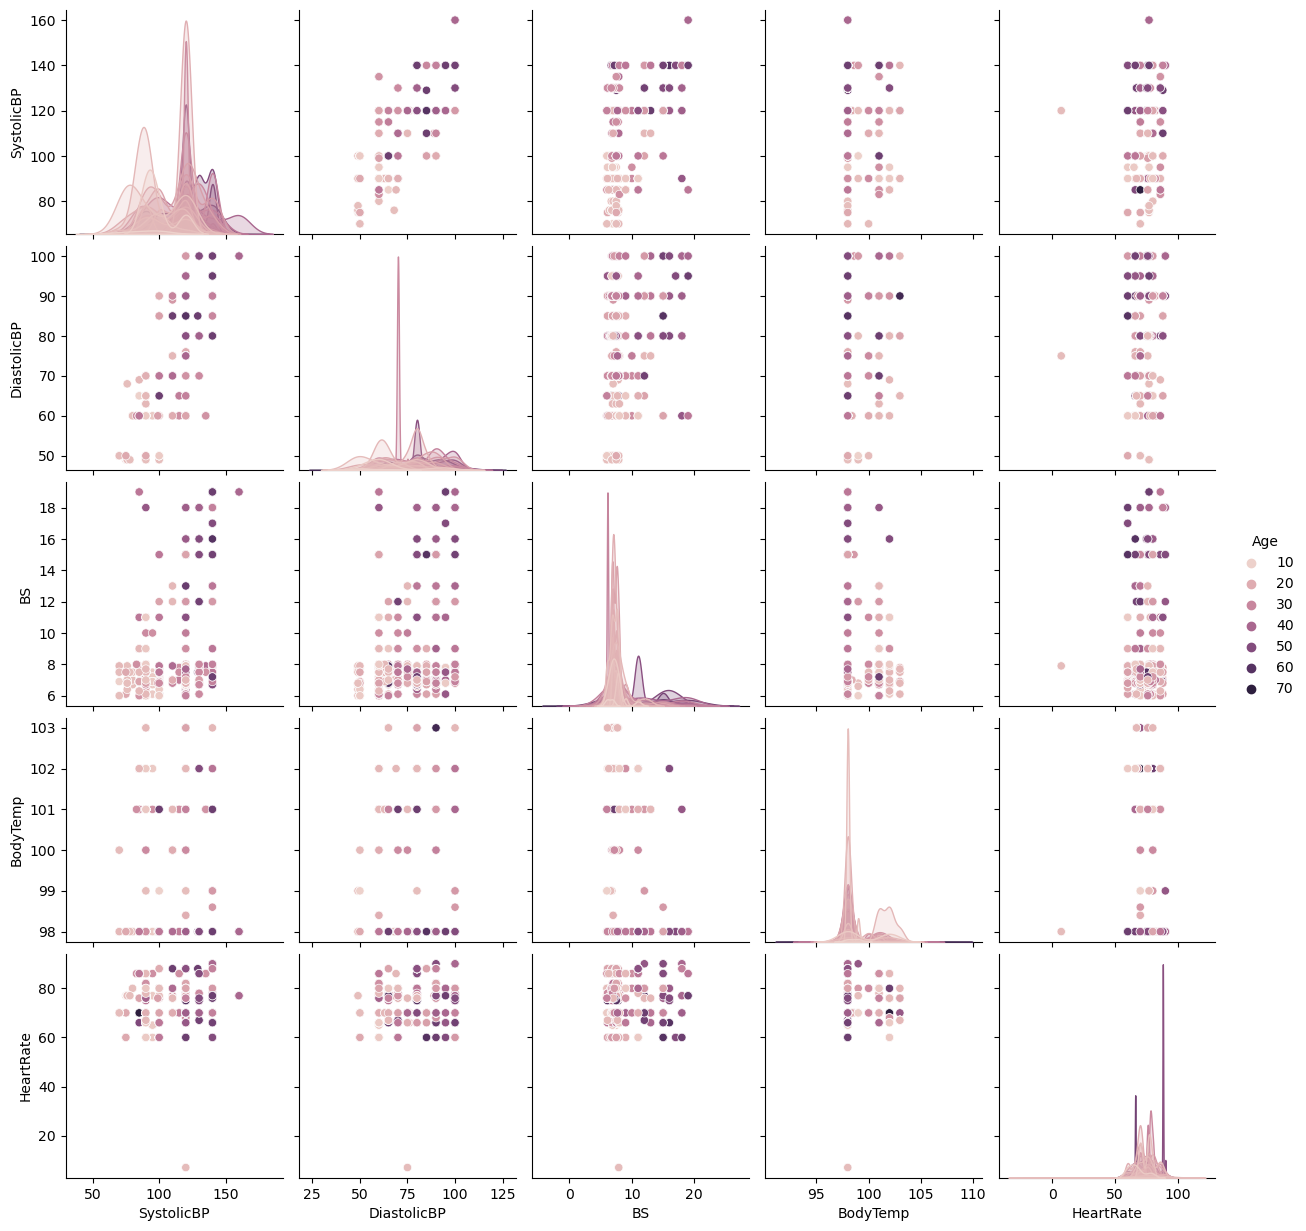

In [5]:
plt.figure(figsize=(15, 15))
sns.pairplot(data, hue="Age")
plt.show()

<Figure size 2400x1650 with 0 Axes>

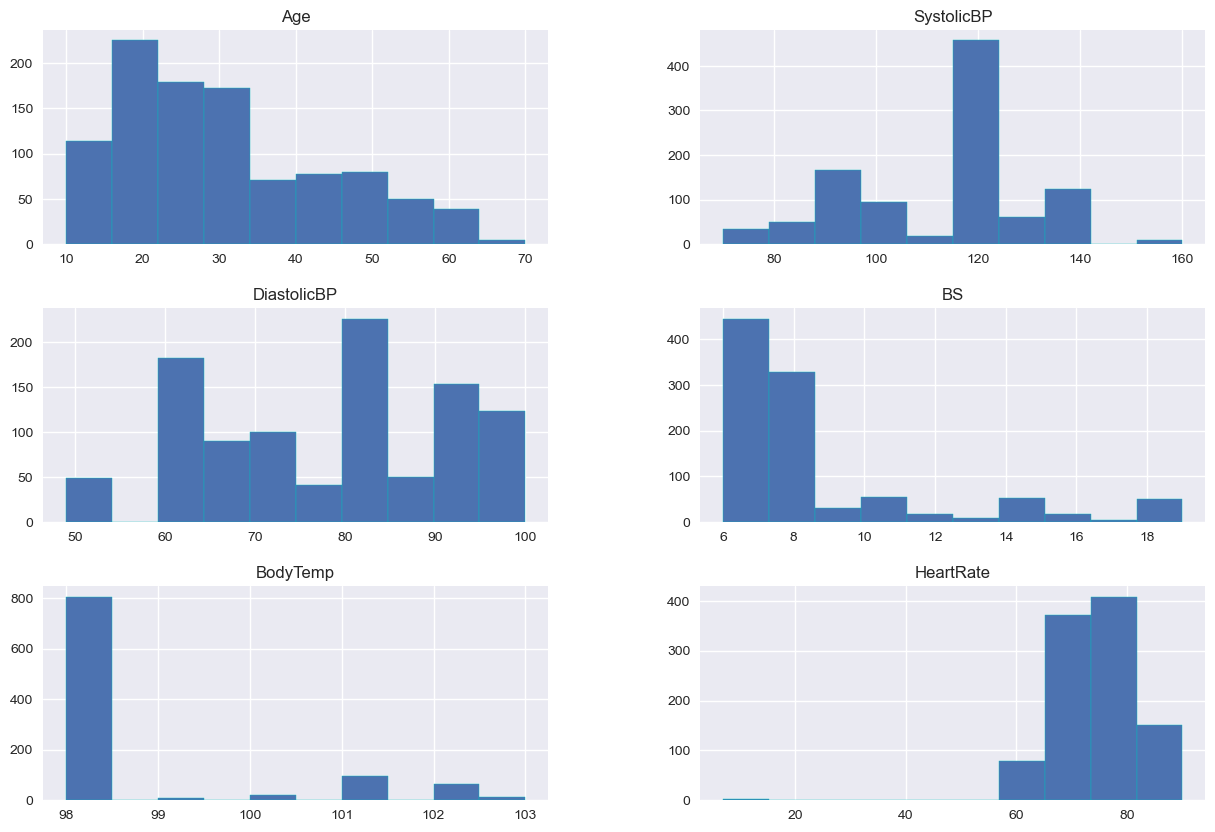

In [6]:
plt.style.use('seaborn')
plt.figure(dpi=300)
data.hist(figsize=(15,10), ec='c')
plt.show()

#### Check for outlier with boxplot visualisation

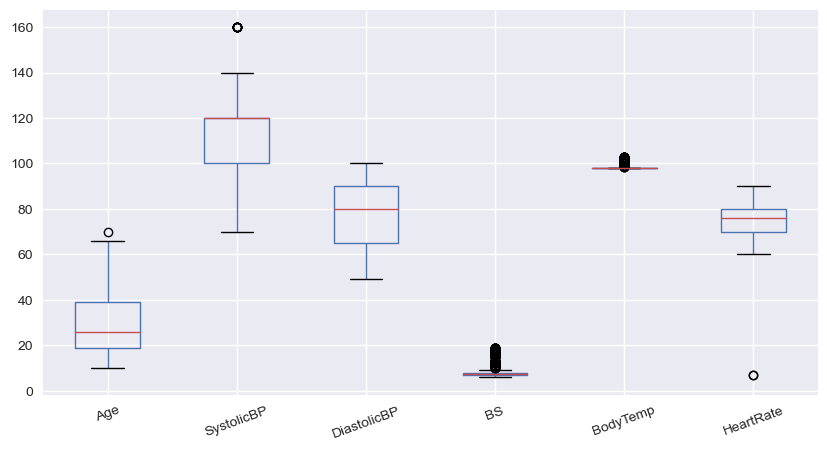

In [7]:
data.boxplot(figsize=(10,5), fontsize =10, rot= 20)
plt.show()

In [8]:
data.loc[(data['HeartRate'] == 7)] #Identifying the outlier in the HeartRate Column.

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
499,16,120,75,7.9,98.0,7,low risk
908,16,120,75,7.9,98.0,7,low risk


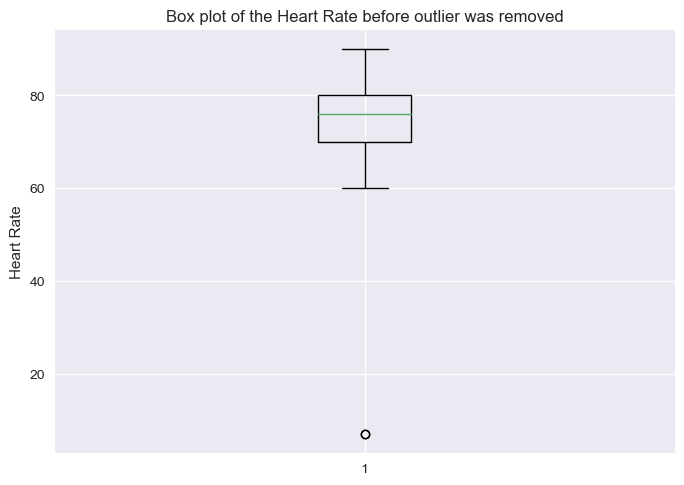

In [9]:
plt.boxplot(data=data, x='HeartRate')
plt.ylabel('Heart Rate')
plt.title('Box plot of the Heart Rate before outlier was removed')
plt.show()

In [10]:
#Remove the Outlier
data = data[data.HeartRate != 7]

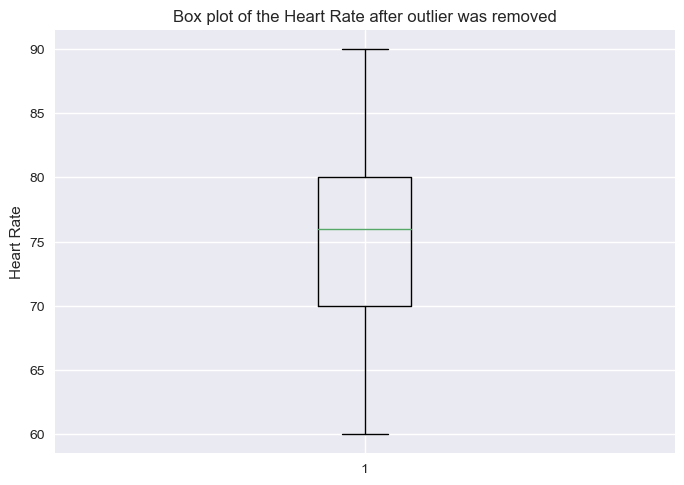

In [11]:
#Confirm the outlier is out
plt.boxplot(data=data, x='HeartRate')
plt.ylabel('Heart Rate')
plt.title('Box plot of the Heart Rate after outlier was removed')
plt.show()

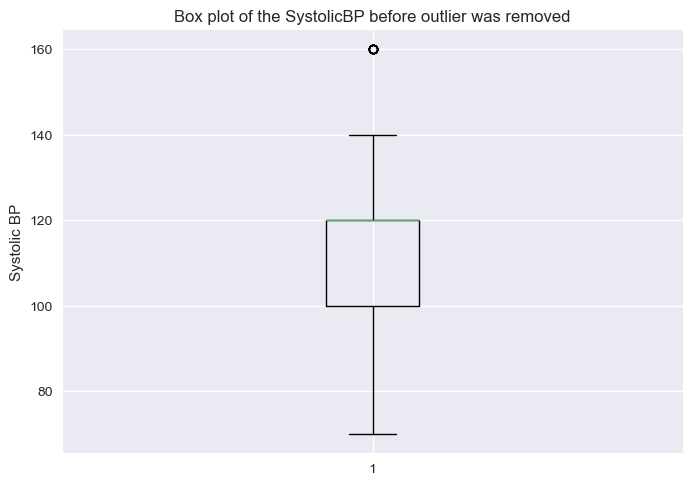

In [12]:
plt.boxplot(data=data, x='SystolicBP')
plt.ylabel('Systolic BP')
plt.title('Box plot of the SystolicBP before outlier was removed')
plt.show()

In [13]:
data.loc[(data['SystolicBP'] > 150)] #Identifying the outlier in the systolic Column. These are duplicates.

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
123,40,160,100,19.0,98.0,77,high risk
130,40,160,100,19.0,98.0,77,high risk
166,40,160,100,19.0,98.0,77,high risk
262,40,160,100,19.0,98.0,77,high risk
362,40,160,100,19.0,98.0,77,high risk
538,40,160,100,19.0,98.0,77,high risk
583,40,160,100,19.0,98.0,77,high risk
689,40,160,100,19.0,98.0,77,high risk
961,40,160,100,19.0,98.0,77,high risk
994,40,160,100,19.0,98.0,77,high risk


In [14]:
#Remove the Outlier in Systolic
data = data[data.SystolicBP != 160]

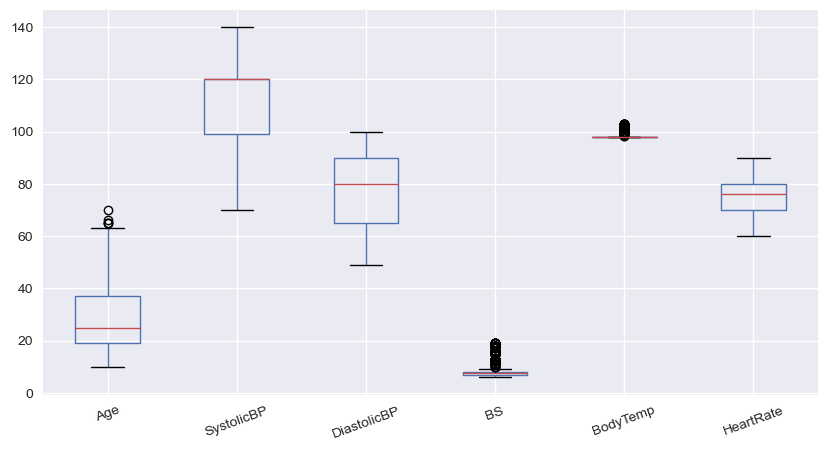

In [15]:
data.boxplot(figsize=(10,5), fontsize =10, rot= 20)
plt.show()

In [16]:
data.loc[(data['Age']> 60)]

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
114,63,140,90,15.0,98.0,90,high risk
313,62,120,80,6.9,98.0,66,low risk
322,65,90,60,6.9,98.0,70,low risk
326,66,85,60,6.9,98.0,86,low risk
338,70,85,60,6.9,102.0,70,low risk
339,65,120,90,6.9,103.0,76,low risk
435,65,130,80,15.0,98.0,86,high risk
502,63,140,90,15.0,98.0,90,high risk


In [17]:
data['RiskLevel'].value_counts()

low risk     404
mid risk     336
high risk    262
Name: RiskLevel, dtype: int64

##### Recoding the risk level column

In [18]:
# create a list of our conditions
conditions = [
    (data['RiskLevel'] == 'high risk'),
    (data['RiskLevel'] =='mid risk' ),
    (data['RiskLevel'] == 'low risk') 
    ]

# create a list of the values we want to assign for each condition
values = ['2', '1', '0']

# create a new column and use np.select to assign values to it using our lists as arguments
data['Risk Level'] = np.select(conditions, values)

data

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,Risk Level
0,25,130,80,15.0,98.0,86,high risk,2
1,35,140,90,13.0,98.0,70,high risk,2
2,29,90,70,8.0,100.0,80,high risk,2
3,30,140,85,7.0,98.0,70,high risk,2
4,35,120,60,6.1,98.0,76,low risk,0
...,...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk,2
1010,55,120,90,18.0,98.0,60,high risk,2
1011,35,85,60,19.0,98.0,86,high risk,2
1012,43,120,90,18.0,98.0,70,high risk,2


In [19]:
new_data = data.drop(columns=['RiskLevel'], axis=1)

In [20]:
# converting type of columns to 'category'
new_data['Risk Level'] = new_data['Risk Level'].astype('int64')

##### Visualise the spread of the risk level column

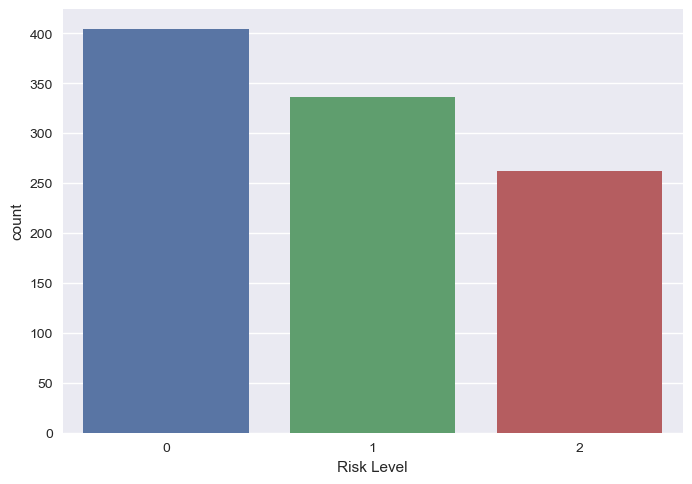

In [32]:
sns.countplot(data= new_data,x=new_data['Risk Level'])
plt.show()

In [38]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1002 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1002 non-null   int64  
 1   SystolicBP   1002 non-null   int64  
 2   DiastolicBP  1002 non-null   int64  
 3   BS           1002 non-null   float64
 4   BodyTemp     1002 non-null   float64
 5   HeartRate    1002 non-null   int64  
 6   Risk Level   1002 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 94.9 KB


## Feature Selection

### Feature Selection using Correlation score and Heatmap

In [39]:
#Checking for collinearity score against the independent variable
cor = new_data.corr()['SystolicBP']
cor

Age            0.412926
SystolicBP     1.000000
DiastolicBP    0.780708
BS             0.376808
BodyTemp      -0.283666
HeartRate     -0.027919
Risk Level     0.378220
Name: SystolicBP, dtype: float64

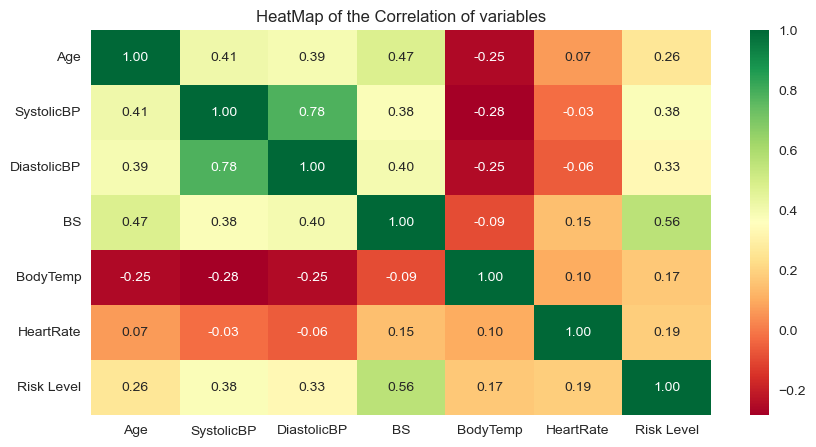

In [40]:
#Checking for collinearity against the independent variable using heatmap visualisation
plt.figure(figsize=(10,5))
cor = new_data.corr()
sns.heatmap(cor, annot=True, cmap="RdYlGn", fmt=".02f", annot_kws=None)
plt.title('HeatMap of the Correlation of variables')
plt.show()

##### Following features against the SystolicBP were revealed by both the correlation matrix and the Heatmap
- Age                    0.417292
- DiastolicBP            0.787198
- BS                     0.425439
- Risk Level             0.397768

### Feature Selection using ChiSquare Selection

In [41]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [42]:
#apply SelectKBest class to extract top best features

X = new_data.drop(columns=['SystolicBP'], axis=1)
y= new_data['SystolicBP']

bestfeatures = SelectKBest(score_func=chi2, k=4)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Paramenter','Score']  #naming the dataframe columns
print(featureScores.nlargest(4,'Score'))  #print features in order

    Paramenter        Score
1  DiastolicBP  1676.510332
0          Age  1179.165939
2           BS   321.773599
5   Risk Level   270.903792


##### Following features against the SystolicBP were revealed as top 4 features
- DiastolicBP  1744.532100
- Age          1209.654189
- BS           440.106163
- Risk Level   282.231388

#### Above Univariate selection shows that the Age, DiastolicBP ,BS, and RiskLevel_high risk are highly correlated and can be used for the regression

### Feature Selection using Feature Importance

[0.06278415727930756, 0.08377065454142084, 0.16801083522695232, 0.17189376010010415, 0.17528910942155543, 0.3382514834306597]


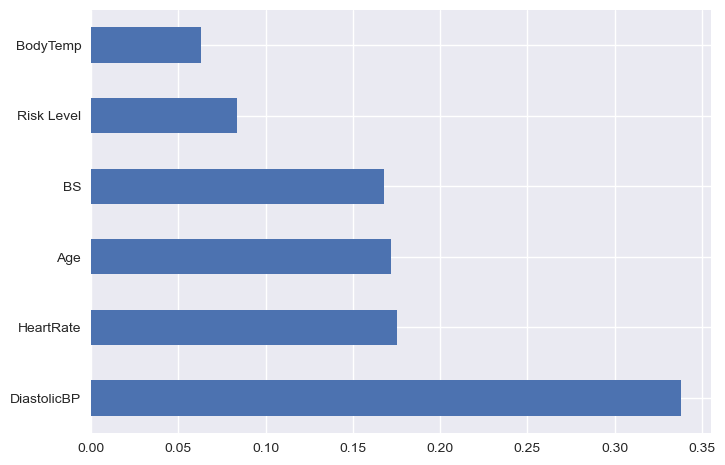

In [43]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(sorted(model.feature_importances_)) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(8).plot(kind='barh')
plt.show()

feature_importances of tree based classifiers shows the following Top 4
- DiastolicBP
- Age
- HeartRate
- BS

From all feature selection methods, we can see that Systolic BP has a strong positive correlation with Diastolic BP, Blood Sugar (BS), and Heart Rate. Out of these, we will choose Diastolic BP as the exploratory variable because it has the highest correlation with Systolic BP. Additionally, it is known that Diastolic BP is an important predictor of cardiovascular risk and is routinely measured along with Systolic BP. Therefore, we have a linear model of the form - SystolicBP = b0 + b1 * DiastolicBP + epsilon

In [44]:
X = new_data['DiastolicBP'].values
y = new_data['SystolicBP'].values

In [45]:
# Add a constant to the independent variable because the linear regression model
# requires a constant term in the equation.
import statsmodels.api as sm
X = sm.add_constant(X)


In [46]:
X

array([[ 1., 80.],
       [ 1., 90.],
       [ 1., 70.],
       ...,
       [ 1., 60.],
       [ 1., 90.],
       [ 1., 65.]])

In [47]:
y

array([130, 140,  90, ...,  85, 120, 120], dtype=int64)

#### Model Training

In [48]:
#Splitting the dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=0)

In [49]:
# Build the linear model using the training set

'''Ordinary Least Squares regression (OLS) is a technique for 
estimating coefficients of linear regression equations which describes 
the relationship between one or more independent variables 
and a dependent variable in a simple or multiple linear regression.'''

model = sm.OLS(y_train, X_train)

In [50]:
# Fit the model to the training set
results = model.fit()

In [51]:
# Print the model summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     1350.
Date:                Fri, 21 Apr 2023   Prob (F-statistic):          7.11e-174
Time:                        13:23:59   Log-Likelihood:                -3053.5
No. Observations:                 801   AIC:                             6111.
Df Residuals:                     799   BIC:                             6120.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.8496      2.180     15.530      0.0

#### Predicting the test result

In [52]:
# Make predictions on the testing set
y_predict = results.predict(X_test)
print(y_predict)

[101.11722632 101.11722632 116.64053571 106.29166278 106.29166278
 121.81497217 101.11722632 137.33828156 126.98940864 111.46609924
 137.33828156 126.98940864 137.33828156  95.94278985 106.29166278
 126.98940864 116.64053571 132.1638451  116.64053571 126.98940864
 121.81497217 106.29166278 106.29166278 116.64053571  85.59391692
 116.64053571 126.98940864 137.33828156 116.64053571 126.98940864
 101.11722632 116.64053571  95.94278985 126.98940864 116.64053571
 106.29166278  95.94278985 121.81497217 111.46609924 116.64053571
  95.94278985 126.98940864 126.98940864 116.64053571 121.81497217
 116.64053571 121.81497217 126.98940864 126.98940864 116.64053571
 116.64053571 116.64053571  95.94278985  95.94278985  95.94278985
 132.1638451   95.94278985 132.1638451  121.81497217 116.64053571
  95.94278985  95.94278985 116.64053571 111.46609924 126.98940864
  95.94278985 126.98940864  95.94278985 126.98940864 101.11722632
 101.11722632 116.64053571  95.94278985 101.11722632 116.64053571
 101.11722

#### Evaluate Model

In [53]:
# Evaluate the model's performance using R-squared
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
r2= r2_score(y_test,y_predict)
mse= mean_squared_error(y_test,y_predict)
mae= mean_absolute_error(y_test,y_predict)

print(f'The R2 score is {r2}')
print(f'The Mean Squred error is {mse}')
print(f'The Mean Absolute error is {mae}')

The R2 score is 0.5308405475514613
The Mean Squred error is 146.14519583123612
The Mean Absolute error is 9.54746320172571


In [54]:
# Make a new prediction on new data
new_diastolicBP = 80
new_systolicBP = results.predict([1, new_diastolicBP])
print("Predicted Systolic BP:", new_systolicBP)

Predicted Systolic BP: [116.64053571]


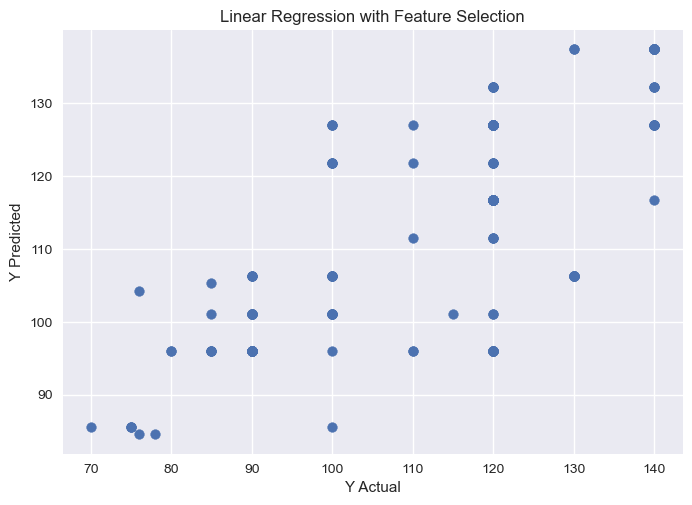

In [56]:
plt.scatter(y_test,y_predict)
plt.xlabel('Y Actual')
plt.ylabel('Y Predicted')
plt.title('Linear Regression with Feature Selection')
plt.show()

### Applying PCA function

In [37]:
X = new_data.drop(columns ='SystolicBP', axis =1).values 
y= new_data['SystolicBP'].values
X

array([[ 25.,  80.,  15.,  98.,  86.,   2.],
       [ 35.,  90.,  13.,  98.,  70.,   2.],
       [ 29.,  70.,   8., 100.,  80.,   2.],
       ...,
       [ 35.,  60.,  19.,  98.,  86.,   2.],
       [ 43.,  90.,  18.,  98.,  70.,   2.],
       [ 32.,  65.,   6., 101.,  76.,   1.]])

In [38]:
print(X.shape, y.shape)

(1002, 6) (1002,)


In [39]:
y

array([130, 140,  90, ...,  85, 120, 120], dtype=int64)

In [40]:
#Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=0)

In [41]:
# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA
  
pca = PCA(n_components = 2)
  
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

#####
#####check to be certain you scale the data before applying PCA
####

[0.58896526 0.26303745]


In [42]:
X_train.shape

(801, 2)

In [43]:
###Training the model with PCA data

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [44]:
#Predicting with PCA data
y_predict = model.predict(X_test)
print(y_predict)

[ 98.4235021  100.94733601 118.35479524 103.72289484 106.23360448
 118.37057751 100.92713989 137.59737733 129.94734979 113.66490693
 133.98078672 129.21619815 140.85276949  93.98143619 106.14608794
 124.96485657 120.11103228 132.06386361 118.33892151 130.871726
 120.588877   107.85784589 106.58224033 113.37755494  87.37727968
 114.74977845 126.57520595 133.96664943 113.7275993  127.4960467
 106.8285819  114.74977845  95.77542468 125.00333607 114.74977845
 106.14608794  97.08059921 128.10066623 110.36465719 114.42042898
  95.75851189 132.23346948 126.57520595 114.74977845 124.03732643
 114.73390472 120.63167889 124.31647488 129.21619815 120.15574692
 116.75658734 114.74977845  96.03458244  97.7723739   93.82174241
 134.00013536  95.5566015  132.06386361 120.63167889 121.25269487
  93.91411578  94.7894719  113.7275993  112.60913819 126.32554805
  93.83761614 122.7707166   94.46307155 124.75903964 100.96320974
 100.02558487 114.08925432  94.73993796  98.8316197  114.74977845
 100.18904156

In [45]:
#Evaluating with PCA data
r2_pca= r2_score(y_test,y_predict)
mse_pca= mean_squared_error(y_test,y_predict)
mae_pca= mean_absolute_error(y_test,y_predict)

print(f'The R2 score is {r2_pca}')
print(f'The Mean Squared error is {mse_pca}')
print(f'The Mean Absolute error is {mae_pca}')

The R2 score is 0.5415273062861055
The Mean Squared error is 142.8162243271459
The Mean Absolute error is 9.605185754948524


In [46]:
#Producing a dataframe for all metrics for feature selection and PCA methods scores
met_data= {'R2 Score': r2, 'Means Square Error': mse, 'Mean Abolute Error': mae, 'PCA R2 Score': r2_pca, 'PCA Means Square Error': mse_pca, 'PCA Mean Abolute Error': mae_pca}
metrics_df = pd.DataFrame(data=met_data, index=[0])
metrics_df

,R2 Score,Means Square Error,Mean Abolute Error,PCA R2 Score,PCA Means Square Error,PCA Mean Abolute Error
0,0.530841,146.145196,9.547463,0.541527,142.816224,9.605186


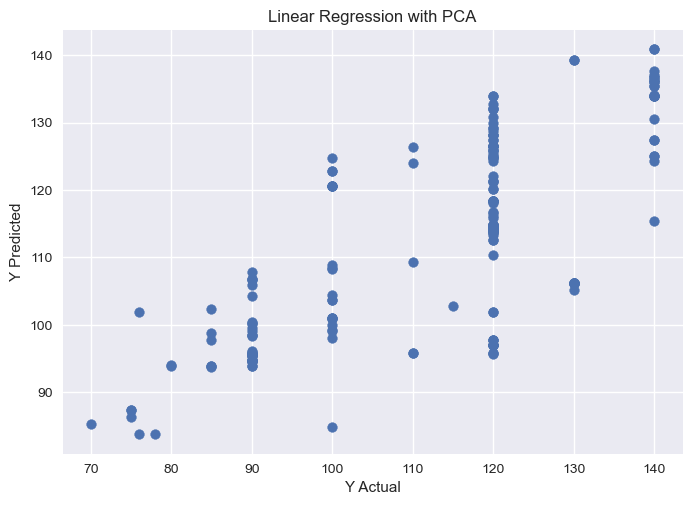

In [47]:
plt.scatter(y_test,y_predict)
plt.xlabel('Y Actual')
plt.ylabel('Y Predicted')
plt.title('Linear Regression with PCA')
plt.show()

### Age grouping

In [48]:
age= new_data['Age'].unique()
print(age)

[25 35 29 30 23 32 42 19 20 48 15 50 10 40 21 18 16 22 49 28 12 60 55 45
 31 17 26 54 44 33 13 34 38 39 63 14 37 51 62 43 65 66 56 70 27 36 59 24
 41 46]


In [49]:
#Apply age group to dataset
new_data.loc[new_data['Age'].between(10,14), 'Maternal Age Group'] = '10-14'
new_data.loc[new_data['Age'].between(15,19), 'Maternal Age Group'] = '15-19'
new_data.loc[new_data['Age'].between(20,24), 'Maternal Age Group'] = '20-24'
new_data.loc[new_data['Age'].between(25,29), 'Maternal Age Group'] = '25-29'
new_data.loc[new_data['Age'].between(30,34), 'Maternal Age Group'] = '30-34'
new_data.loc[new_data['Age'].between(35,39), 'Maternal Age Group'] = '35-39'
new_data.loc[new_data['Age'].between(40,44), 'Maternal Age Group'] = '40-44'
new_data.loc[new_data['Age'].between(45,49), 'Maternal Age Group'] = '45-49'
new_data.loc[new_data['Age'].between(50,54), 'Maternal Age Group'] = '50-54'
new_data.loc[new_data['Age'].between(55,59), 'Maternal Age Group'] = '55-59'
new_data.loc[new_data['Age'].between(60,64), 'Maternal Age Group'] = '60-64'
new_data.loc[new_data['Age'] >65, 'Maternal Age Group'] = 'Above 65'


In [50]:
new_data

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,Risk Level,Maternal Age Group
0,25,130,80,15.0,98.0,86,2,25-29
1,35,140,90,13.0,98.0,70,2,35-39
2,29,90,70,8.0,100.0,80,2,25-29
3,30,140,85,7.0,98.0,70,2,30-34
4,35,120,60,6.1,98.0,76,0,35-39
...,...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,2,20-24
1010,55,120,90,18.0,98.0,60,2,55-59
1011,35,85,60,19.0,98.0,86,2,35-39
1012,43,120,90,18.0,98.0,70,2,40-44


#### Age and HeartRate

In [51]:
# Calculate the Pearson correlation coefficient between age and heart rate
corr = new_data["Age"].corr(new_data["HeartRate"], method="pearson")

# Print the correlation coefficient
print("Pearson correlation coefficient between age and heart rate:", corr)

Pearson correlation coefficient between age and heart rate: 0.06539437795117219


In [52]:
# calculate the mean heart rate for each age group
mean_hr_by_age = new_data.groupby('Maternal Age Group')['HeartRate'].mean()

In [53]:
print(mean_hr_by_age)

Maternal Age Group
10-14       70.203704
15-19       73.587444
20-24       73.636872
25-29       77.937500
30-34       74.509091
35-39       73.803030
40-44       74.559322
45-49       82.288889
50-54       71.428571
55-59       74.000000
60-64       72.513514
Above 65    78.000000
Name: HeartRate, dtype: float64


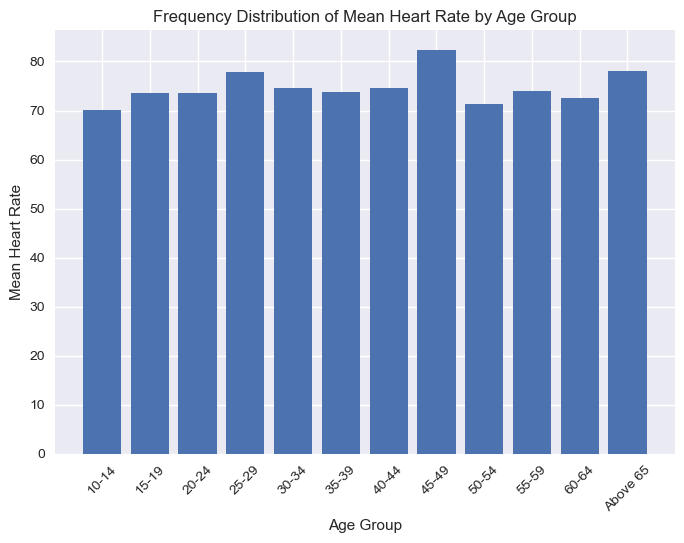

In [54]:
# plot the mean heart rate for each age group
plt.bar(mean_hr_by_age.index, mean_hr_by_age.values)

# set the title and labels
plt.title('Frequency Distribution of Mean Heart Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Mean Heart Rate')

# rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# display the plot
plt.show()


Text(0.5, 1.0, 'Age vs Mean HeartRate Relationship')

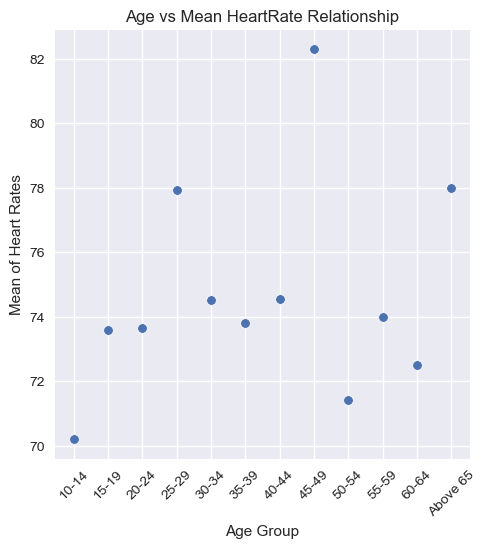

In [55]:
#Plot of the age group against the Mean of the Heart Rate

mean_HR = new_data.groupby('Maternal Age Group').agg(HR_Mean = ('HeartRate','mean'))
sns.relplot(data= mean_HR, x='Maternal Age Group', y='HR_Mean')
plt.xticks(rotation=45)
plt.ylabel('Mean of Heart Rates')
plt.xlabel('Age Group')
plt.title('Age vs Mean HeartRate Relationship')

###### Systolic BP condition

In [185]:
import numpy as np
# create a list of our conditions
conditions = [
    (new_data['SystolicBP'] >= 140),
    (new_data['SystolicBP'] >= 110) & (new_data['SystolicBP'] <= 139),
    (new_data['SystolicBP'] < 110)
    ]

# create a list of the values we want to assign for each condition
values = ['High', 'Normal', 'Low']

# create a new column and use np.select to assign values to it using our lists as arguments
new_data['Systolic BP Condition'] = np.select(conditions, values)



###### Diastolic BP condition

In [186]:
# create a list of our conditions
conditions = [
    (new_data['DiastolicBP'] >= 90),
    (new_data['DiastolicBP'] >=70 ) & (new_data['DiastolicBP'] <= 89),
    (new_data['DiastolicBP'] < 70) 
    ]

# create a list of the values we want to assign for each condition
values = ['High', 'Normal', 'Low']

# create a new column and use np.select to assign values to it using our lists as arguments
new_data['Diastolic BP Condition'] = np.select(conditions, values)


In [187]:
new_data

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,Risk Level,Systolic BP Condition,Diastolic BP Condition
0,25,130,80,15.0,98.0,86,2,Normal,Normal
1,35,140,90,13.0,98.0,70,2,High,High
2,29,90,70,8.0,100.0,80,2,Low,Normal
3,30,140,85,7.0,98.0,70,2,High,Normal
4,35,120,60,6.1,98.0,76,0,Normal,Low
...,...,...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,2,Normal,Low
1010,55,120,90,18.0,98.0,60,2,Normal,High
1011,35,85,60,19.0,98.0,86,2,Low,Low
1012,43,120,90,18.0,98.0,70,2,Normal,High


In [188]:
new_data['Diastolic BP Condition'].unique()

array(['Normal', 'High', 'Low'], dtype=object)

In [189]:
new_data['Systolic BP Condition'].unique()

array(['Normal', 'High', 'Low'], dtype=object)

In [190]:
#Installed mlxtend

#!pip install mlxtend


In [191]:
#importing all required packages..

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

In [192]:
association_data = new_data[['Systolic BP Condition','Diastolic BP Condition']]
association_data

,Systolic BP Condition,Diastolic BP Condition
0,Normal,Normal
1,High,High
2,Low,Normal
3,High,Normal
4,Normal,Low
...,...,...
1009,Normal,Low
1010,Normal,High
1011,Low,Low
1012,Normal,High


In [193]:
from sklearn.preprocessing import OneHotEncoder

In [194]:
data2 = pd.get_dummies(association_data,columns =['Systolic BP Condition','Diastolic BP Condition'], prefix=['SystolicBP', 'DiastolicBP'])
data2

,SystolicBP_High,SystolicBP_Low,SystolicBP_Normal,DiastolicBP_High,DiastolicBP_Low,DiastolicBP_Normal
0,0,0,1,0,0,1
1,1,0,0,1,0,0
2,0,1,0,0,0,1
3,1,0,0,0,0,1
4,0,0,1,0,1,0
...,...,...,...,...,...,...
1009,0,0,1,0,1,0
1010,0,0,1,1,0,0
1011,0,1,0,0,1,0
1012,0,0,1,1,0,0


In [195]:
#Get frequent itemsets from a one-hot DataFrame
apriori(data2,min_support=0.005,use_colnames=True)

C:\Users\HP PC\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.119760,(SystolicBP_High)
1,0.343313,(SystolicBP_Low)
2,0.536926,(SystolicBP_Normal)
3,0.265469,(DiastolicBP_High)
4,0.320359,(DiastolicBP_Low)
5,0.414172,(DiastolicBP_Normal)
6,0.106786,"(DiastolicBP_High, SystolicBP_High)"
7,0.012974,"(DiastolicBP_Normal, SystolicBP_High)"
8,0.009980,"(DiastolicBP_High, SystolicBP_Low)"
9,0.269461,"(DiastolicBP_Low, SystolicBP_Low)"


In [196]:
frequency_itemsets = apriori(data2,min_support=0.05,use_colnames=True)
frequency_itemsets['Length'] = frequency_itemsets['itemsets'].apply(lambda x: len(x))
frequency_itemsets

C:\Users\HP PC\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets,Length
0,0.119760,(SystolicBP_High),1
1,0.343313,(SystolicBP_Low),1
2,0.536926,(SystolicBP_Normal),1
3,0.265469,(DiastolicBP_High),1
4,0.320359,(DiastolicBP_Low),1
5,0.414172,(DiastolicBP_Normal),1
6,0.106786,"(DiastolicBP_High, SystolicBP_High)",2
7,0.269461,"(DiastolicBP_Low, SystolicBP_Low)",2
8,0.063872,"(SystolicBP_Low, DiastolicBP_Normal)",2
9,0.148703,"(SystolicBP_Normal, DiastolicBP_High)",2


### Support, Confidence, Conviction and Lift 

In [219]:
from mlxtend.frequent_patterns import association_rules

# Generate association rules with minimum confidence of 0.8 
#It is set to 0.8 to ensure that the generated association rules are highly likely to be true.)
rules = association_rules(frequency_itemsets, metric="confidence", min_threshold=0.5)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(SystolicBP_High),(DiastolicBP_High),0.119760,0.265469,0.106786,0.891667,3.358835,0.074994,6.780286
1,(DiastolicBP_Low),(SystolicBP_Low),0.320359,0.343313,0.269461,0.841121,2.450011,0.159477,4.133263
2,(SystolicBP_Low),(DiastolicBP_Low),0.343313,0.320359,0.269461,0.784884,2.450011,0.159477,3.159411
3,(DiastolicBP_High),(SystolicBP_Normal),0.265469,0.536926,0.148703,0.560150,1.043254,0.006165,1.052800
4,(SystolicBP_Normal),(DiastolicBP_Normal),0.536926,0.414172,0.337325,0.628253,1.516890,0.114946,1.575878
5,(DiastolicBP_Normal),(SystolicBP_Normal),0.414172,0.536926,0.337325,0.814458,1.516890,0.114946,2.495788


In [220]:
# Calculate support, confidence, conviction, and lift for the rules
rules['support'] = rules['support'].round(4)
rules['confidence'] = rules['confidence'].round(4)
rules['lift'] = rules['lift'].round(4)
rules['conviction'] = rules['conviction'].round(4)

In [221]:
# Print the rules and their metrics
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift', 'conviction']])

            antecedents           consequents  support  confidence    lift  \
0     (SystolicBP_High)    (DiastolicBP_High)   0.1068      0.8917  3.3588   
1     (DiastolicBP_Low)      (SystolicBP_Low)   0.2695      0.8411  2.4500   
2      (SystolicBP_Low)     (DiastolicBP_Low)   0.2695      0.7849  2.4500   
3    (DiastolicBP_High)   (SystolicBP_Normal)   0.1487      0.5602  1.0433   
4   (SystolicBP_Normal)  (DiastolicBP_Normal)   0.3373      0.6283  1.5169   
5  (DiastolicBP_Normal)   (SystolicBP_Normal)   0.3373      0.8145  1.5169   

   conviction  
0      6.7803  
1      4.1333  
2      3.1594  
3      1.0528  
4      1.5759  
5      2.4958  


### Clustering

In [70]:
new_data['SystolicBP'].unique()

array([130, 140,  90, 120,  85, 110,  70, 100,  75,  95,  76,  80, 115,
       135, 129,  83,  99,  78], dtype=int64)

In [71]:
#Importing the libraries for clustering
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

In [72]:
data

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,Risk Level
0,25,130,80,15.0,98.0,86,high risk,2
1,35,140,90,13.0,98.0,70,high risk,2
2,29,90,70,8.0,100.0,80,high risk,2
3,30,140,85,7.0,98.0,70,high risk,2
4,35,120,60,6.1,98.0,76,low risk,0
...,...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk,2
1010,55,120,90,18.0,98.0,60,high risk,2
1011,35,85,60,19.0,98.0,86,high risk,2
1012,43,120,90,18.0,98.0,70,high risk,2


In [73]:
#Getting the dataframe for the clustring

clust_data = data.drop(columns=['RiskLevel'], axis=1)
# converting type of columns to 'category'
clust_data['Risk Level'] = new_data['Risk Level'].astype('int64')
clust_data

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,Risk Level
0,25,130,80,15.0,98.0,86,2
1,35,140,90,13.0,98.0,70,2
2,29,90,70,8.0,100.0,80,2
3,30,140,85,7.0,98.0,70,2
4,35,120,60,6.1,98.0,76,0
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,2
1010,55,120,90,18.0,98.0,60,2
1011,35,85,60,19.0,98.0,86,2
1012,43,120,90,18.0,98.0,70,2


#### Determine number of clusters

In [74]:
def no_of_cluster(data, max_k):
    means= []
    inertia =[]
    for k in range(1, max_k):
        kmeans = KMeans(n_clusters = k)
        kmeans.fit(data)
        means.append(k)
        inertia.append(kmeans.inertia_)
    #Plot the elbow to determine the number of clusters
    fig = plt.subplots(figsize=(10,5))
    plt.plot(means, inertia, 'o-')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

C:\Users\HP PC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP PC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP PC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP PC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP PC\anaconda3\lib\site-packages\sklearn\clust

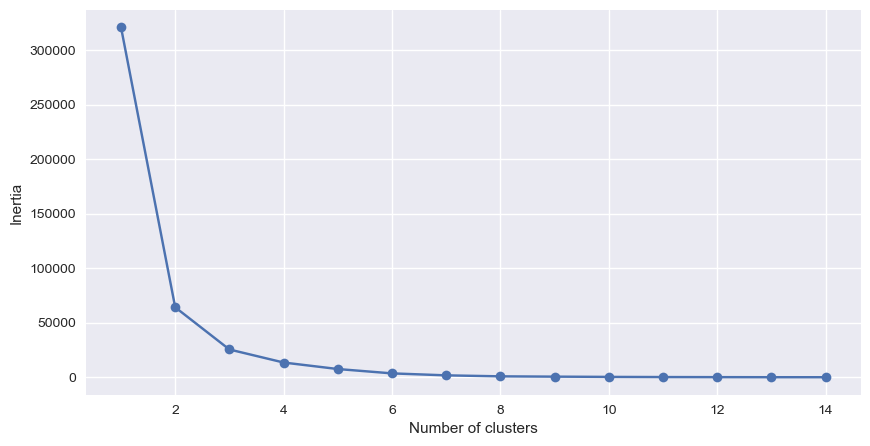

In [75]:
no_of_cluster(clust_data[['SystolicBP']], 15)

#### Cluster of similar systolic BP

In [113]:
# Select the feature set
X = clust_data['SystolicBP'].values.reshape(-1, 1)

## Visualizing the cluster

### KMeans

In [123]:
# Fit KMeans model with 3 clusters
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

C:\Users\HP PC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


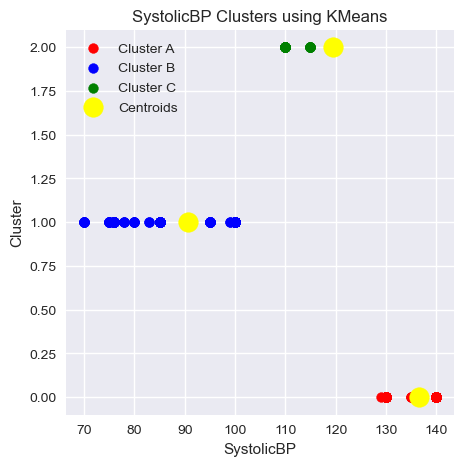

In [124]:
# Visualize the clusters
fig= plt.figure(figsize=(5,5))
plt.scatter(X[y_kmeans == 0], y_kmeans[y_kmeans == 0], s=50, c='red', label='Cluster A')
plt.scatter(X[y_kmeans == 1], y_kmeans[y_kmeans == 1], s=50, c='blue', label='Cluster B')
plt.scatter(X[y_kmeans == 2], y_kmeans[y_kmeans == 2], s=50, c='green', label='Cluster C')
plt.scatter(kmeans.cluster_centers_[:, 0], [0, 1, 2], s=200, c='yellow', label='Centroids')
plt.title('SystolicBP Clusters using KMeans')
plt.xlabel('SystolicBP')
plt.ylabel('Cluster')
plt.legend(loc=2)
plt.show()


### GMM

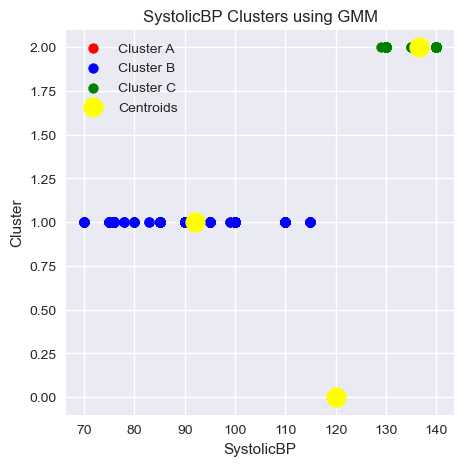

In [125]:
gmm = GaussianMixture(n_components=3).fit(X)
y_gmm = gmm.predict(X)
fig= plt.figure(figsize=(5,5))
#plt.scatter(X, labels, c=labels, cmap='plasma')
plt.scatter(X[y_gmm == 0], y_gmm[y_gmm == 0], s=50, c='red', label='Cluster A')
plt.scatter(X[y_gmm == 1], y_gmm[y_gmm == 1], s=50, c='blue', label='Cluster B')
plt.scatter(X[y_gmm == 2], y_gmm[y_gmm == 2], s=50, c='green', label='Cluster C')
plt.scatter(gmm.means_[:, 0], [0, 1, 2], s=200, c='yellow', label='Centroids')
plt.title('SystolicBP Clusters using GMM')
plt.xlabel('SystolicBP')
plt.ylabel('Cluster')
plt.legend()
plt.show()

### Agglomerative

In [117]:
aggcluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
y_agg =aggcluster.fit_predict(X)

C:\Users\HP PC\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


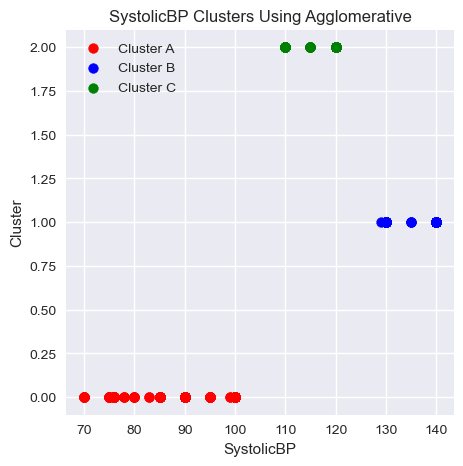

In [126]:
fig = plt.figure(figsize=(5,5))
#labels = aggcluster.labels_
#colors= ['red' if labels == 0 else 'blue'  if labels == 1 else 'green'  if labels == 2 else 'yellow'   for labels in labels]
#plt.scatter(X, labels, c=colors)
plt.scatter(X[y_agg == 0], y_agg[y_agg == 0], s=50, c='red', label='Cluster A')
plt.scatter(X[y_agg == 1], y_agg[y_agg == 1], s=50, c='blue', label='Cluster B')
plt.scatter(X[y_agg == 2], y_agg[y_agg == 2], s=50, c='green', label='Cluster C')
plt.title('SystolicBP Clusters Using Agglomerative')
plt.xlabel('SystolicBP')
plt.ylabel('Cluster')
plt.legend(loc=2)
plt.show()


In [127]:
#Calculate the silhouette score for kmeans
sil_KM= silhouette_score(clust_data, y_kmeans, metric='euclidean')
sil_KM

0.3108536322805961

In [128]:
#Calculate the silhouette score for GMM
sil_GMM= silhouette_score(clust_data, y_gmm, metric='euclidean')
sil_GMM

0.3026960356651124

In [129]:
#Calculate the silhouette score for AGG
sil_Agg= silhouette_score(clust_data, y_agg, metric='euclidean')
sil_Agg

0.3108536322805961

In [130]:
#Producing a dataframe for all Siljouette scores
data= {'KMeans': sil_KM, 'AGG': sil_Agg, 'GMM': sil_GMM}
goodness_df = pd.DataFrame(data=data, index=[0])
goodness_df

,KMeans,AGG,GMM
0,0.310854,0.310854,0.302696


From the results, we can see that KMeans and AGG have the highest Silhouette Score of 0.310854, which suggests that the clusters are relatively well-separated. GMM both has a slightly lower score of 0.302696, indicating that the clusters may be less well-separated than those obtained using KMeans.

### Correlation between Age and systolic BP.

In [90]:
from scipy.stats import pearsonr

# Calculate Pearson correlation coefficient and p-value
corr_coef, p_value = pearsonr(df['Age'], df['SystolicBP'])

# Print the results
print("Correlation coefficient:", corr_coef)



Correlation coefficient: 0.4129260177056042


Since the correlation coefficient is closer to 0 than it is to 1, then it indicates no correlation between the two variables. The correlation coefficient ranges from -1 to 1, where -1 indicates a perfect negative correlation, 0 indicates no correlation, and 1 indicates a perfect positive correlation.

#### End